<a href="https://colab.research.google.com/github/falawar7/AAI614_ELAWAR/blob/main/Week8/FE_Notebook8_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# AAI614: Data Science & its Applications

*Notebook 8.5: NLP Analysis of Large Text Datasets*



In [1]:
import ssl
ssl._create_default_https_context = ssl._create_unverified_context

from sklearn.datasets import fetch_20newsgroups
newsgroups = fetch_20newsgroups(remove=('headers', 'footers'))

The `newsgroups` object contains messages from 20 different message-board categories. We can view the category names by printing `newsgroups.target_names`.

**Listing 15. 2. Printing the names of all 20 newsgroups**

In [2]:
print(newsgroups.target_names)

['alt.atheism', 'comp.graphics', 'comp.os.ms-windows.misc', 'comp.sys.ibm.pc.hardware', 'comp.sys.mac.hardware', 'comp.windows.x', 'misc.forsale', 'rec.autos', 'rec.motorcycles', 'rec.sport.baseball', 'rec.sport.hockey', 'sci.crypt', 'sci.electronics', 'sci.med', 'sci.space', 'soc.religion.christian', 'talk.politics.guns', 'talk.politics.mideast', 'talk.politics.misc', 'talk.religion.misc']


The actual text information is stored within the `newsgroups.data` attribute. The attribute contains a list of posted texts. Thus, `newsgroups.data[0]` contains the text of the first stored newsgroup post.

**Print the first newsgroup post**

In [3]:
print(newsgroups.data[0])

I was wondering if anyone out there could enlighten me on this car I saw
the other day. It was a 2-door sports car, looked to be from the late 60s/
early 70s. It was called a Bricklin. The doors were really small. In addition,
the front bumper was separate from the rest of the body. This is 
all I know. If anyone can tellme a model name, engine specs, years
of production, where this car is made, history, or whatever info you
have on this funky looking car, please e-mail.


The post is about a car. It probably was posted to the car-discussion newsgroup,  _rec.autos_. We can confirm by printing `newsgroups.target_names[newsgroups.target[0]]`.

**Print newsgroup name at index 0**

In [4]:
origin = newsgroups.target_names[newsgroups.target[0]]
print(f"The post at index 0 first appeared in the '{origin}' group")

The post at index 0 first appeared in the 'rec.autos' group


Lets dive deeper into our newsgroup dataset by printing out the dataset size.

**Counting the number of newsgroup posts**

In [5]:
dataset_size = len(newsgroups.data)
print(f"Our dataset contains {dataset_size} newsgroup posts")

Our dataset contains 11314 newsgroup posts


Our dataset contains over 11,000 posts. Our goal is to cluster these posts by topic. To do so, we'll need to transform each newsgroup post into TF vector. We will compute these vectors using Scikit-Learn.

## Vectorizing Documents Using Scikit-Learn

Scikit-Learn provides built-in class for transforming input texts into TF vectors. That class is called `CountVectorizer`. Initializing `CounterVectorizer` will create a `vectorizer` object capable of vectorizing our texts.

**Initializing a `CountVectorizer` object**

In [6]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer()

We are now ready to vectorize the texts stored in the `newsgroups.data` list. All we need to do is run `vectorizer.fit_transform(newsgroups.data)`. The method-call will return the TF matrix corresponding to the vectorized newsgroup posts.

**Listing 15. 7. Computing a TF matrix with Scikit-Learn**

In [7]:
tf_matrix = vectorizer.fit_transform(newsgroups.data)
print(tf_matrix)

  (0, 108644)	4
  (0, 110106)	1
  (0, 57577)	2
  (0, 24398)	2
  (0, 79534)	1
  (0, 100942)	1
  (0, 37154)	1
  (0, 45141)	1
  (0, 70570)	1
  (0, 78701)	2
  (0, 101084)	4
  (0, 32499)	4
  (0, 92157)	1
  (0, 100827)	6
  (0, 79461)	1
  (0, 39275)	1
  (0, 60326)	2
  (0, 42332)	1
  (0, 96432)	1
  (0, 67137)	1
  (0, 101732)	1
  (0, 27703)	1
  (0, 49871)	2
  (0, 65338)	1
  (0, 14106)	1
  :	:
  (11313, 55901)	1
  (11313, 93448)	1
  (11313, 97535)	1
  (11313, 93393)	1
  (11313, 109366)	1
  (11313, 102215)	1
  (11313, 29148)	1
  (11313, 26901)	1
  (11313, 94401)	1
  (11313, 89686)	1
  (11313, 80827)	1
  (11313, 72219)	1
  (11313, 32984)	1
  (11313, 82912)	1
  (11313, 99934)	1
  (11313, 96505)	1
  (11313, 72102)	1
  (11313, 32981)	1
  (11313, 82692)	1
  (11313, 101854)	1
  (11313, 66399)	1
  (11313, 63405)	1
  (11313, 61366)	1
  (11313, 7462)	1
  (11313, 109600)	1


Our printed `tf_matrix` does not appear to be a NumPy array. What sort of data structure is it? We can check, by printing `type(tf_matrix)`.

**Checking the data-type of `tf_matrix`**

In [8]:
print(type(tf_matrix))

<class 'scipy.sparse._csr.csr_matrix'>


The matrix is SciPy object called `csr_matrix`. **CSR** stands for **Compressed Sparse Row**, which is a storage format for compressing matrices that are composed mostly of zeros. These mostly empty matrices are referred to as **sparse matrices**. They can be made smaller by storing only the non-zero elements. This compression leads to more efficient memory usage, and also faster computation.

This interplay between various matrix types is useful, but also a bit confusing. In order to minimize confusion, we will now convert `tf_matrix` into a 2D NumPy array.

**Converting a CSR matrix to a NumPy array**

In [9]:
tf_np_matrix = tf_matrix.toarray()
print(tf_np_matrix)

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


The printed matrix is a 2D NumPy array. The matrix columns represent posts. Thus, the total column-count equals our dataset’s vocabulary size.

**Checking the vocabulary size**

In [10]:
assert tf_np_matrix.shape == tf_matrix.shape
num_posts, vocabulary_size = tf_np_matrix.shape
print(f"Our collection of {num_posts} newsgroup posts contain a total of "
      f"{vocabulary_size} unique words")

Our collection of 11314 newsgroup posts contain a total of 114751 unique words


Our data contains 114,000 unique words. However, most posts will hold only a few dozen of these words. We can measure the unique word-count of a post at index `i` by counting the number of non-zero elements in row `tf_np_matrix[i]`.  

**Counting the unique words in the car post**

In [11]:
import numpy as np
tf_vector = tf_np_matrix[0]
non_zero_indices = np.flatnonzero(tf_vector)
num_unique_words = non_zero_indices.size
print(f"The newsgroup in row 0 contains {num_unique_words} unique words.")
print("The actual word-counts map to the following column indices:\n")
print(non_zero_indices)

The newsgroup in row 0 contains 64 unique words.
The actual word-counts map to the following column indices:

[ 14106  15549  22088  23323  24398  27703  29357  30093  30629  32194
  32305  32499  37154  39275  42332  42333  43643  45089  45141  49871
  49881  50165  54442  55453  57577  58321  58842  60116  60326  64083
  65338  67137  67140  68931  69080  70570  72915  75280  78264  78701
  79055  79461  79534  82759  84398  87690  89161  92157  93304  95225
  96145  96432 100406 100827 100942 101084 101732 108644 109086 109254
 109294 110106 112936 113262]


The first newsgroup post contains 64 unique words.  What are these words? In order to find out, we’ll need a mapping between TF vector indices and word-values. That mapping can be generated by calling `vectorizer.get_feature_names()`.

**Printing the unique words in the car post**

In [12]:
words = vectorizer.get_feature_names_out()
unique_words = [words[i] for i in non_zero_indices]
print(unique_words)

['60s', '70s', 'addition', 'all', 'anyone', 'be', 'body', 'bricklin', 'bumper', 'called', 'can', 'car', 'could', 'day', 'door', 'doors', 'early', 'engine', 'enlighten', 'from', 'front', 'funky', 'have', 'history', 'if', 'in', 'info', 'is', 'it', 'know', 'late', 'looked', 'looking', 'made', 'mail', 'me', 'model', 'name', 'of', 'on', 'or', 'other', 'out', 'please', 'production', 'really', 'rest', 'saw', 'separate', 'small', 'specs', 'sports', 'tellme', 'the', 'there', 'this', 'to', 'was', 'were', 'whatever', 'where', 'wondering', 'years', 'you']


We’ve printed all the words in `newsgroups.data[0]`. Of course, not all these words have equal mention-counts. Some words occur more frequently than others.  Lets print the 10 most frequent words within the post, along with their associated counts.

**Printing the most frequent words in the car post**

In [13]:
import pandas as pd
data = {'Word': unique_words,
        'Count': tf_vector[non_zero_indices]}

df = pd.DataFrame(data).sort_values('Count', ascending=False)
print(df[:10].to_string(index=False))

  Word  Count
   the      6
  this      4
   was      4
   car      4
    if      2
    is      2
    it      2
  from      2
    on      2
anyone      2


Four of the 64 words within the post are mentioned at-least 4 times. One of these four words is _car_. The other three words, however, have nothing to do with cars. These words, _the_, _this_, and _was_, are among the most common words in the English language. NLP practitioners refer to such common words as **stop words**. Running `CountVectorizer(stopwords='english')` remove all stop words during vectorization.

**Removing stop words during vectorization**

In [14]:
vectorizer = CountVectorizer(stop_words='english')
tf_matrix = vectorizer.fit_transform(newsgroups.data)
assert tf_matrix.shape[1] < 114751

words = vectorizer.get_feature_names_out()
for common_word in ['the', 'this', 'was', 'if', 'it', 'on']:
    assert common_word not in words

All stop words have been deleted from the recomputed `tf_matrix`. Now, we can re-generate the 10 most frequent words in `newsgroups.data[0]`.

**Re-printing the top words after stop-word deletion**

In [15]:
tf_np_matrix = tf_matrix.toarray()
tf_vector = tf_np_matrix[0]
non_zero_indices = np.flatnonzero(tf_vector)
unique_words = [words[index] for index in non_zero_indices]
data = {'Word': unique_words,
        'Count': tf_vector[non_zero_indices]}

df = pd.DataFrame(data).sort_values('Count', ascending=False)
print(f"After stop-word deletion, {df.shape[0]} unique words remain.")
print("The 10 most frequent words are:\n")
print(df[:10].to_string(index=False))

After stop-word deletion, 34 unique words remain.
The 10 most frequent words are:

      Word  Count
       car      4
       60s      1
       saw      1
   looking      1
      mail      1
     model      1
production      1
    really      1
      rest      1
  separate      1


After stop-word filtering, 34 words remain. Among them, _car_ is the only word that is mentioned more than once. The other 33 words share a mention-count of one. However, not all words are equal in their relevancy. For instance, the word _model_ refers to a car-model. Meanwhile, the word _really_ is more general.  Thus, _really_ is  less relevant than _model_, because the former is mentioned more posts.  Therefore, when ranking words by relevance, we should leverage both post-frequency and count.

## Ranking Words by Both Post-Frequency and Count

Each of the 34 words in `df.Word` appears in a certain fraction of newsgroup posts. In NLP, this fraction is referred to as the **document frequency** of a word. Our goal is to compute 34 document frequencies, in order to improve our word-relevancy rankings. First, we’ll want to select those columns of `tf_np_matrix` that correspond to the 34 non-zero indices within the `non_zero_indices` array.

**Filtering matrix columns with `non_zero_indices`**

In [16]:
sub_matrix = tf_np_matrix[:,non_zero_indices]
print("We obtained a sub-matrix correspond to the 34 words within post 0. "
      "The first row of the sub-matrix is:")
print(sub_matrix[0])

We obtained a sub-matrix correspond to the 34 words within post 0. The first row of the sub-matrix is:
[1 1 1 1 1 1 1 4 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]


The first row of `sub_matrix` corresponds to the 34 word-counts in `df`. Together, all the matrix rows correspond to counts across all posts. We’ll need to convert these counts into binary values.

**Converting word-counts to binary values**

In [17]:
from sklearn.preprocessing import binarize
binary_matrix = binarize(sub_matrix)
print(binary_matrix)

[[1 1 1 ... 1 1 1]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 1 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


Now, we’ll need to add together the rows of our binary sub-matrix. This will produce a vector of integer counts. Each ith vector element will equal the number of unique posts in which word `i` is present.

**Summing matrix rows to obtain post counts**

In [18]:
unique_post_mentions = binary_matrix.sum(axis=0)
print("This vector counts the unique posts in which each word is "
      f"mentioned:\n {unique_post_mentions}")

This vector counts the unique posts in which each word is mentioned:
 [  18   21  202  314    4   26  802  536  842  154   67  348  184   25
    7  368  469 3093  238  268  780  901  292   95 1493  407  354  158
  574   95   98    2  295 1174]


We should note that the above 3 procedures can be combined into a single line of code, by running `binarize(tf_np_matrix[:,non_zero_indices]).sum(axis=0)`. Furthermore, substituting NumPy’s `tf_np_matrix` with SciPy’s `tf_matrix` will still produce the same post-instance counts.

**Computing post mention-counts in a single line of code**

In [19]:
np_post_mentions = binarize(tf_np_matrix[:,non_zero_indices]).sum(axis=0)
csr_post_mentions = binarize(tf_matrix[:,non_zero_indices]).sum(axis=0)
print(f'NumPy matrix-generated counts:\n {np_post_mentions}\n')
print(f'CSR matrix-generated counts:\n {csr_post_mentions}')

NumPy matrix-generated counts:
 [  18   21  202  314    4   26  802  536  842  154   67  348  184   25
    7  368  469 3093  238  268  780  901  292   95 1493  407  354  158
  574   95   98    2  295 1174]

CSR matrix-generated counts:
 [[  18   21  202  314    4   26  802  536  842  154   67  348  184   25
     7  368  469 3093  238  268  780  901  292   95 1493  407  354  158
   574   95   98    2  295 1174]]


Based on the printed vector of post-mentions, we know that some words appear in thousands of posts. Other words appear in less than a dozen posts. Lets transform these counts into document frequencies, and align the frequencies with `df.Word`. Afterwards, we’ll output all the words that are mentioned in at-least 10% of newsgroup posts.

**Printing the words with the highest document frequency**

In [20]:
document_frequencies = unique_post_mentions / dataset_size
data = {'Word': unique_words,
        'Count': tf_vector[non_zero_indices],
        'Document Frequency': document_frequencies}

df = pd.DataFrame(data)
df_common_words = df[df['Document Frequency'] >= .1]
print(df_common_words.to_string(index=False))

  Word  Count  Document Frequency
  know      1            0.273378
really      1            0.131960
 years      1            0.103765


Three of the 34 words appear have document frequency that’s greater than 0.1. As expected, these words are very general, and not car-specific. We thus can utilize document frequencies for ranking purposes.

**Ranking words by both count and document frequency**

In [21]:
df_sorted = df.sort_values(['Count', 'Document Frequency'],
                           ascending=[False, True])
print(df_sorted[:10].to_string(index=False))

      Word  Count  Document Frequency
       car      4            0.047375
    tellme      1            0.000177
  bricklin      1            0.000354
     funky      1            0.000619
       60s      1            0.001591
       70s      1            0.001856
 enlighten      1            0.002210
    bumper      1            0.002298
     doors      1            0.005922
production      1            0.008397


Our sorting was successful. New car-related words, such as _bumper_, are now present in our list of top-ranked words.  Lets combine the word-counts and the document frequencies into a single score. We’ll start by computing `1/document_frequencies`. This will produce an array of **inverse document frequencies**, a term that’s commonly shortened to **IDF**. Next, we’ll multiply `df.Word` by the IDF array, in order to compute the combined score.

**Combining counts and frequencies into a single score**

In [22]:
inverse_document_frequencies = 1 / document_frequencies
df['IDF'] = inverse_document_frequencies
df['Combined'] = df.Count * inverse_document_frequencies
df_sorted = df.sort_values('Combined', ascending=False)
print(df_sorted[:10].to_string(index=False))

      Word  Count  Document Frequency         IDF    Combined
    tellme      1            0.000177 5657.000000 5657.000000
  bricklin      1            0.000354 2828.500000 2828.500000
     funky      1            0.000619 1616.285714 1616.285714
       60s      1            0.001591  628.555556  628.555556
       70s      1            0.001856  538.761905  538.761905
 enlighten      1            0.002210  452.560000  452.560000
    bumper      1            0.002298  435.153846  435.153846
     doors      1            0.005922  168.865672  168.865672
     specs      1            0.008397  119.094737  119.094737
production      1            0.008397  119.094737  119.094737


Our new ranking has failed! The word _car_ no longer appears at the top of the list. There is a problem with the IDF values: some of them are huge! Thus, when we multiply word-counts by TDFIF values, the TFIDF will dominate. We thus need to somehow make our TFIDF values smaller. One way to shrink the values down is to apply a logarithmic function. For instance, running `np.log10(1000000)` will return `6`.

**Shrinking a large value using its logarithm**

In [23]:
assert np.log10(1000000) == 6

Lets recompute our ranking score by running `df.Count * np.log10(df.IDF)`. The product of the counts and the shrunken IDF values should lead to a more reasonable ranking metric.

**Adjusting the combined score using logarithms**

In [24]:
df['Combined'] = df.Count * np.log10(df.IDF)
df_sorted = df.sort_values('Combined', ascending=False)
print(df_sorted[:10].to_string(index=False))

     Word  Count  Document Frequency         IDF  Combined
      car      4            0.047375   21.108209  5.297806
   tellme      1            0.000177 5657.000000  3.752586
 bricklin      1            0.000354 2828.500000  3.451556
    funky      1            0.000619 1616.285714  3.208518
      60s      1            0.001591  628.555556  2.798344
      70s      1            0.001856  538.761905  2.731397
enlighten      1            0.002210  452.560000  2.655676
   bumper      1            0.002298  435.153846  2.638643
    doors      1            0.005922  168.865672  2.227541
    specs      1            0.008397  119.094737  2.075893


Our adjusted ranking score has yielded good results. The word _car_ is once again present at the top of the ranked list. Also, _bumper_ still appears amongst the top 10 ranked words. Meanwhile, _really_ is missing from the list.

Our effective score is called the **term frequency-inverse document frequency**, or **TFIDF** for short. TFIDF is a simple but powerful metric for ranking words within a document. Furthermore, it can also be utilized to vectorize words within a document. Within larger text datasets, TFIDF vectors provide a greater signal of textual similarity and divergence.  That is why Scikit-Learn provides with a built-in class for TFIDF vector computation.


### Computing TFIDF Vectors with Scikit-Learn

That `TfidfVectorizer` class is nearly identical to `CounterVectorizer`, except that it takes IDF into account during the vectorization process.

**LComputing a TFIDF matrix with Scikit-Learn**

In [25]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer(stop_words='english')
tfidf_matrix = tfidf_vectorizer.fit_transform(newsgroups.data)
assert tfidf_matrix.shape == tf_matrix.shape

Our `tfdif_vectorizer` has learned the same vocabulary as the simpler TF vectorizer. In fact, the indices of words in `tfidf_matrix` are identical to those of `tf_matrix`.

**Confirming the preservation of vectorized word indices**

In [ ]:
#assert tfidf_vectorizer.get_feature_names_out() == words

Since word-order is preserved, we should expect the non-zero indices of `tfidf_matrix[0]` to equal our previously computed `non_zero_indices` array.

**Confirming the preservation of non-zero indices**

In [26]:
tfidf_np_matrix = tfidf_matrix.toarray()
tfidf_vector = tfidf_np_matrix[0]
tfidf_non_zero_indices = np.flatnonzero(tfidf_vector)
assert np.array_equal(tfidf_non_zero_indices,
                      non_zero_indices)

The non-zero indices of `tf_vector` and `tfidif_vector` are identical. We thus can add the TFIDF vector as a column in our existing `df` table. Adding a _TFIDF_ column will allow us to compare Scikit-Learn’s output with our manually-computed score.

**Adding a TFIDF vector to the existing Pandas table**

In [27]:
df['TFIDF'] = tfidf_vector[non_zero_indices]

Sorting by `df.TFIDF` should produce a relevance ranking that is consistent with our previous observations. Lets verify that both `df.TFIDF` and `df.Combined` produce the same word-rankings after sorting.

**Sorting words by `df.TFIDF`**

In [28]:
df_sorted_old = df.sort_values('Combined', ascending=False)
df_sorted_new = df.sort_values('TFIDF', ascending=False)
assert np.array_equal(df_sorted_old['Word'].values,
                      df_sorted_new['Word'].values)
print(df_sorted_new[:10].to_string(index=False))

     Word  Count  Document Frequency         IDF  Combined    TFIDF
      car      4            0.047375   21.108209  5.297806 0.459552
   tellme      1            0.000177 5657.000000  3.752586 0.262118
 bricklin      1            0.000354 2828.500000  3.451556 0.247619
    funky      1            0.000619 1616.285714  3.208518 0.234280
      60s      1            0.001591  628.555556  2.798344 0.209729
      70s      1            0.001856  538.761905  2.731397 0.205568
enlighten      1            0.002210  452.560000  2.655676 0.200827
   bumper      1            0.002298  435.153846  2.638643 0.199756
    doors      1            0.005922  168.865672  2.227541 0.173540
    specs      1            0.008397  119.094737  2.075893 0.163752


Our word-rankings have remained unchanged. However, the values of the _TFIDF_ and _Combined_ columns are not identical. As it turns out, Scikit-Learn automatically normalizes its TFIDF vector results. The magnitude of `df.TFIDF` has been modified to equal 1.

**Listing 15. 30. Confirming that our TFIDF vector is normalized**

In [29]:
from numpy.linalg import norm
assert norm(df.TFIDF.values) == 1

Why would Scikit-Learn automatically normalize the vectors? For our own benefit! As discussed in Section Thirteen, its easier to compute text-vector similarity when all vector magnitudes equal 1. Consequently, our normalized TFIDF matrix is primed for similarity analysis.

## 15.4. Computing Similarities Across Large Document Datasets

Which of our newsgroup posts is most similar to `newsgroups.post[0]`? We can obtain the answer by computing all the cosine similarities between `tfidf_np_matrix` and `tf_np_matrix[0]`.

**Listing 15. 31. Computing similarities to a single newsgroup post**

In [30]:
cosine_similarities = tfidf_np_matrix @ tfidf_np_matrix[0]
print(cosine_similarities)

[1.         0.00834093 0.04448717 ... 0.         0.00270615 0.01968562]


We can see that `cosine_similarities[0]` is equal to 1.0. This is not surprising, since `newsgroups_data[0]` will have a perfect similarity with itself. What is the next-highest similarity in the vector? We can find out by calling `np.argsort(cosine_similarities)[-2]`.

**Listing 15. 32. Finding the most similar newsgroup post**

In [31]:
most_similar_index = np.argsort(cosine_similarities)[-2]
similarity = cosine_similarities[most_similar_index]
most_similar_post = newsgroups.data[most_similar_index]
print(f"The following post has a cosine similarity of {similarity:.2f} "
       "with newsgroups.data[0]:\n")
print(most_similar_post)

The following post has a cosine similarity of 0.64 with newsgroups.data[0]:

In article <1993Apr20.174246.14375@wam.umd.edu> lerxst@wam.umd.edu (where's my  
thing) writes:
> 
>  I was wondering if anyone out there could enlighten me on this car I saw
> the other day. It was a 2-door sports car, looked to be from the late 60s/
> early 70s. It was called a Bricklin. The doors were really small. In  
addition,
> the front bumper was separate from the rest of the body. This is 
> all I know. If anyone can tellme a model name, engine specs, years
> of production, where this car is made, history, or whatever info you
> have on this funky looking car, please e-mail.

Bricklins were manufactured in the 70s with engines from Ford. They are rather  
odd looking with the encased front bumper. There aren't a lot of them around,  
but Hemmings (Motor News) ususally has ten or so listed. Basically, they are a  
performance Ford with new styling slapped on top.

>    ---- brought to you by your neig

How do we compute the matrix of all-by-all cosine similarities? The naive situation is to multiply `tfidf_np_matrix` with its transpose. However, for reasons discussed in Section Thirteen, this matrix multiplication is not computationally efficient. We need to reduce the matrix size, using `TruncatedSVD`.

**Listing 15. 33. Dimensionally reducing `tfidf_matrix` using SVD**

In [32]:
np.random.seed(0)
from sklearn.decomposition import TruncatedSVD

shrunk_matrix = TruncatedSVD(n_components=100).fit_transform(tfidf_matrix)
print(f"We've dimensionally-reduced a {tfidf_matrix.shape[1]}-column "
      f"{type(tfidf_matrix)} matrix.")
print(f"Our output is a {shrunk_matrix.shape[1]}-column "
      f"{type(shrunk_matrix)} matrix.")

We've dimensionally-reduced a 114441-column <class 'scipy.sparse._csr.csr_matrix'> matrix.
Our output is a 100-column <class 'numpy.ndarray'> matrix.


Our shrunk matrix contains just 100 columns. We can now efficiently compute the cosine similarities by running `shrunk_matrix @ shrunk_matrix.T`. However, first we’ll need to confirm that the matrix rows remain normalized.

**Listing 15. 34. Checking the magnitude of `shrunk_matrix[0]`**

In [33]:
magnitude = norm(shrunk_matrix[0])
print(f"The magnitude of the first row is {magnitude:.2f}")

The magnitude of the first row is 0.49


The magnitude of the row is less than 1. Scikit-Learn’s SVD output has not been automatically normalized. We’ll need to manually normalize the matrix, prior to computing the similarities.

**Listing 15. 35. Normalizing the SVD output**

In [34]:
from sklearn.preprocessing import normalize
shrunk_norm_matrix = normalize(shrunk_matrix)
magnitude = norm(shrunk_norm_matrix[0])
print(f"The magnitude of the first row is {magnitude:.2f}")

The magnitude of the first row is 1.00


The shrunken matrix has been normalized. Now, running `shrunk_norm_matrix @ shrunk_norm_matrix.T` should produce a matrix of all-by-all cosine similarities.

**Listing 15. 36. Computing all-by-all cosine similarities**

In [35]:
cosine_similarity_matrix = shrunk_norm_matrix @ shrunk_norm_matrix.T

We have our similarity matrix. Lets leverage it to choose a random pair of very similar texts.  

**Listing 15. 37. Choosing a random pair of similar posts**

In [36]:
np.random.seed(1)
index1 = np.random.randint(dataset_size)
index2 = np.argsort(cosine_similarity_matrix[index1])[-2]
similarity = cosine_similarity_matrix[index1][index2]
print(f"The posts at indices {index1} and {index2} share a cosine "
      f"similarity of {similarity:.2f}")

The posts at indices 235 and 7805 share a cosine similarity of 0.91


Our two selected indices share a very high cosine similarity of 0.91. The corresponding posts must be exceedingly similar. Lets confirm. First, we’ll print the post at `index2`.

**Listing 15. 38. Printing a randomly chosen post**

In [37]:
print(newsgroups.data[index2].replace('\n\n', '\n'))

Hello,
	Who can tell me   Where can I find the PD or ShareWare   
Which can CAPTURE windows 3.1's output of printer mananger?
	I want to capture the output of HP Laser Jet III.
	Though the PostScript can setup to print to file,but HP can't.
	I try DOS's redirect program,but they can't work in Windows 3.1
		Thankx for any help....
--
 Internet Address: u7911093@cc.nctu.edu.tw
    English Name: Erik Wang
    Chinese Name: Wang Jyh-Shyang


Once again, the printed post is a question. Its safe to assume that the post at `index1` is an answer to that question.

**Listing 15. 39. Printing the most-similar post response**

In [39]:
print(newsgroups.data[index1].replace('\n\n', '\n'))

u7911093@cc.nctu.edu.tw ("By SWH ) writes:
>Who can tell me which program (PD or ShareWare) can redirect windows 3.1's
>output of printer manager to file? 
>	I want to capture HP Laser Jet III's print output.
> 	Though PostScript can setup print to file,but HP can't.
>	I use DOS's redirect program,but they can't work in windows.
>		Thankx for any help...
>--
> Internet Address: u7911093@cc.nctu.edu.tw
>    English Name: Erik Wang
>    Chinese Name: Wang Jyh-Shyang
> National Chiao-Tung University,Taiwan,R.O.C.
Try setting up another HPIII printer but when choosing what port to connect it
to choose FILE instead of like :LPT1.  This will prompt you for a file name
everytime you print with that "HPIII on FILE" printer. Good Luck.



Thus far, we have examined two pairs of similar posts. Lets challenge ourselves to find something more interesting. We’ll search for clusters of similar texts, where posts within a cluster share some text without perfectly overlapping.

## Clustering Texts by Topic

In Section Ten, we introduced two clustering algorithms; K-means and DBSCAN. K-means can only cluster on Euclidean distance. Conversely, DBSCAN, can cluster based on any distance metric. One possible metric is cosine distance which equals 1 minus cosine similarity. Lets cluster `shrunk_matrix` with BDSCAN, using the cosine distance. We'll set the `eps` and `min_samples` parameters to 0.4 and 50, respectively.

**Listing 15. 40. Clustering newsgroup posts with DBSCAN**

In [40]:
from sklearn.cluster import DBSCAN
cluster_model = DBSCAN(eps=0.4, min_samples=50, metric='cosine')
clusters = cluster_model.fit_predict(shrunk_matrix)

W can expect our `clusters` array to contain somewhere between 10 and 25 clusters. Otherwise, there’s something wrong with our input clustering parameters. We’ll now proceed to count the number of clusters.
**Listing 15. 41. Counting the number of DBSCAN clusters**

In [41]:
cluster_count = clusters.max() + 1
print(f"We've generated {cluster_count} DBSCAN clusters")

We've generated 3 DBSCAN clusters


We’ve generated just 3 clusters, which is way lower than our expected cluster count. Clearly, our DBSCAN parameters were wrong. Unfortunately, DBSCAN lacks a well-established algorithm for optimizing these two crucial parameters.

K-means, on the other hand, takes as input a single K parameter. However, the K-means algorithm can only cluster based on Euclidean distance.  With basic algebra, we can easily show that the Euclidean distance of two normalized vectors is proportional to the square-root of the cosine distance. This relationship provides us with mathematical justification for clustering `shrunk_norm_matrix` using K-means.

We’ll want to estimate the true value of K by generating an Elbow plot. To this end, we’ll execute K-means across K values of 1 through 60, and afterwards plot the inertia results. Running Scikit-Learn's implementation of the **Mini Batch K-means** algorithm will produce this plot much faster than regular K-means.

**Listing 15. 42. Comparing `KMeans` to `MiniBatchKMeans`**

**Plotting DBSCAN**

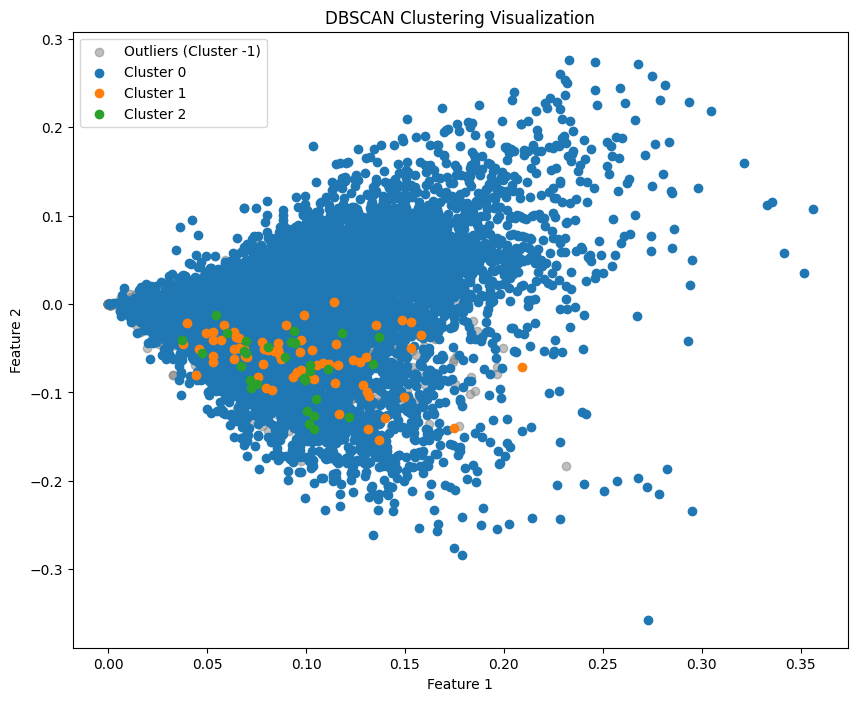

In [43]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming 'shrunk_matrix' is your input data and 'clusters' is the result of DBSCAN
# Filter the data points by their cluster labels
unique_clusters = np.unique(clusters)

# Create a scatter plot
plt.figure(figsize=(10, 8))

# Plot each cluster
for cluster in unique_clusters:
    # For outliers, 'cluster' is -1
    cluster_points = shrunk_matrix[clusters == cluster]

    if cluster == -1:
        plt.scatter(cluster_points[:, 0], cluster_points[:, 1], color='gray', label=f'Outliers (Cluster {cluster})', alpha=0.5)
    else:
        plt.scatter(cluster_points[:, 0], cluster_points[:, 1], label=f'Cluster {cluster}')

# Add labels and title
plt.title('DBSCAN Clustering Visualization')
plt.xlabel('Feature 1')  # Adjust according to your data
plt.ylabel('Feature 2')  # Adjust according to your data
plt.legend()
plt.show()


In [65]:
import plotly.express as px
import pandas as pd
import numpy as np

# Assuming 'shrunk_matrix' is your input data and 'clusters' is the result of DBSCAN
# Convert the shrunk_matrix and clusters into a pandas DataFrame for easier plotting with Plotly
# Creating column names dynamically to match the shape of shrunk_matrix
num_features = shrunk_matrix.shape[1]
column_names = [f'Feature {i}' for i in range(1, num_features + 1)]

df = pd.DataFrame(shrunk_matrix, columns=column_names)  # Assign the generated column names
df['Cluster'] = clusters

# Create a scatter plot with Plotly
# Only using the first two features for visualization
fig = px.scatter(df, x='Feature 1', y='Feature 2', color='Cluster',
                 title='DBSCAN Clustering Visualization',
                 labels={'Cluster': 'Cluster ID'},
                 color_continuous_scale='Viridis')

# Customize the layout
fig.update_layout(
    xaxis_title='Feature 1',
    yaxis_title='Feature 2',
    showlegend=True
)

# Show the interactive plot
fig.show()

In [44]:
np.random.seed(0)
import time
from sklearn.cluster import KMeans, MiniBatchKMeans

k=20
times = []
for KMeans_class in [KMeans, MiniBatchKMeans]:
    start_time = time.time()
    KMeans_class(k).fit(shrunk_norm_matrix)
    times.append(time.time() - start_time)

running_time_ratio = times[0] / times[1]
print(f"Mini Batch K-means ran {running_time_ratio:.2f} times faster "
       "than regular K-means")

Mini Batch K-means ran 3.67 times faster than regular K-means


`MiniBatchKMeans` runs approximately  10x faster than regular `KMeans`.  We’ll now proceed to generate the Elbow plot, using Mini Batch K-means.

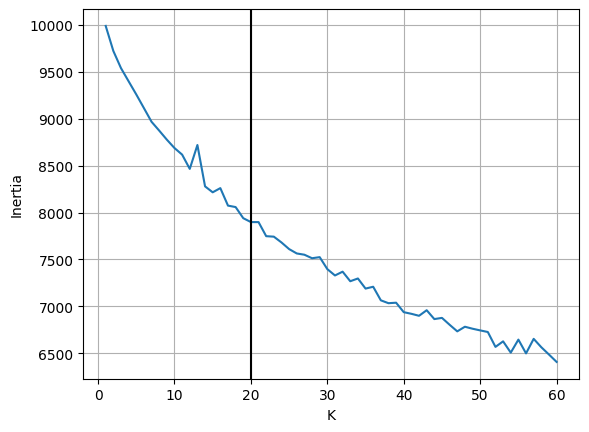

In [45]:
np.random.seed(0)
import matplotlib.pyplot as plt

k_values = range(1, 61)
inertia_values = [MiniBatchKMeans(k).fit(shrunk_norm_matrix).inertia_
                  for k in k_values]
plt.plot(k_values, inertia_values)
plt.xlabel('K')
plt.ylabel('Inertia')
plt.axvline(20, c='k')
plt.grid(True)
plt.show()

Our plotted curve decreases smoothly. The precise location of a bent elbow-shaped transition is difficult to spot. We do see that the curve is noticeably more steep when K is less than 20. Somewhere after 20 clusters, the curve begins to flatten out. We can infer that 20 is a reasonable estimate of the K parameter. Our solution isn’t perfect, but it’s feasible. Sometimes, when we deal with real-world data, a feasible solution is the best that we can expect.

We will now divide `shrunk_norm_matrix` into 20 clusters.

**Listing 15. 44. Clustering newsgroup posts into 20 clusters**

In [46]:
np.random.seed(0)
cluster_model = KMeans(n_clusters=20)
clusters = cluster_model.fit_predict(shrunk_norm_matrix)
df = pd.DataFrame({'Index': range(clusters.size), 'Cluster': clusters})

Now that've clustered our texts, lets explore the cluster contents. We'll begin by analyzing a single cluster. Later, we'll proceed to analyze all clusters simultaneously.

### 15.5.1. Exploring a Single Text Cluster

One of our 20 clusters contains the car-post at index 0 of `newsgroups.data`. Lets isolate and count the number of texts that group together with that car-themed message.

**Listing 15. 45. Isolating the car cluster**

In [47]:
df_car = df[df.Cluster == clusters[0]]
cluster_size = df_car.shape[0]
print(f"{cluster_size} posts cluster together with the car-themed post "
       "at index 0")

412 posts cluster together with the car-themed post at index 0


**WARNING: The contents of the cluster might differ slightly on your local machine. The total cluster size might minimally diverge from 393. If this happens, then the subsequent sequence of code listings might produce different results. Regardless of these differences, you should still be able to draw similar conclusions from your locally generated outputs.**

393 posts cluster with the car-themed texts at index 0. Presumably, these posts are also about cars. If so, then a randomly chosen post should mention an automobile.

**Listing 15. 46. Printing a random post in the car cluster**

In [48]:
np.random.seed(1)
def get_post_category(index):
    target_index = newsgroups.target[index]
    return newsgroups.target_names[target_index]

random_index = np.random.choice(df_car.Index.values)
post_category = get_post_category(random_index)

print(f"This post appeared in the {post_category} discussion group:\n")
print(newsgroups.data[random_index].replace('\n\n', '\n'))

This post appeared in the rec.autos discussion group:

My wife and I looked at, and drove one last fall. This was a 1992 model.
It was WAYYYYYYYYY underpowered. I could not imagine driving it in the
mountains here in Colorado at anything approaching highway speeds. I
have read that the new 1993 models have a newer, improved hp engine. 
I'm quite serious that I laughed in the salesman face when he said "once
it's broken in it will feel more powerful". I had been used to driving a
Jeep 4.0L 190hp engine. I believe the 92's Land Cruisers (Land Yachts)
were 3.0L, the sames as the 4Runner, which is also underpowered (in my
own personal opinion). 
They are big cars, very roomy, but nothing spectacular.



This post belongs in the _rec.autos_ discussion group. How many of the nearly 400 posts within the cluster belong to _rec.autos_? Lets find out.

**Listing 15. 47. Checking cluster membership to _rec.autos_**

In [49]:
rec_autos_count = 0
for index in df_car.Index.values:
    if get_post_category(index) == 'rec.autos':
        rec_autos_count += 1

rec_autos_percent = 100 * rec_autos_count / cluster_size
print(f"{rec_autos_percent:.2f}% of posts within the cluster appeared "
       "in the rec.autos discussion group")

83.98% of posts within the cluster appeared in the rec.autos discussion group


84% of the posts in within the cluster appeared in _rec.autos_. What about the remaining 16% of clustered posts? Lets isolate the indices of posts in `df_car` that do not belong to _rec.autos_. Afterwards, we’ll choose a random index and then print the associated post.

**Listing 15. 48. Examining a post that did not appear in rec.autos**

**Plotting the REC**

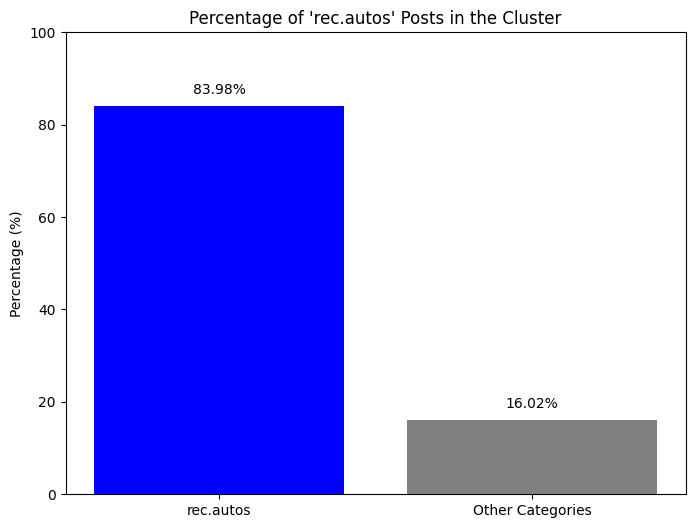

In [50]:
import matplotlib.pyplot as plt

# Calculate the percentage of 'rec.autos' posts within the cluster
rec_autos_count = 0
for index in df_car.Index.values:
    if get_post_category(index) == 'rec.autos':
        rec_autos_count += 1

rec_autos_percent = 100 * rec_autos_count / cluster_size
other_percent = 100 - rec_autos_percent  # Remaining percentage

# Create a bar chart to visualize the result
categories = ['rec.autos', 'Other Categories']
percentages = [rec_autos_percent, other_percent]

plt.figure(figsize=(8, 6))
plt.bar(categories, percentages, color=['blue', 'gray'])

# Add title and labels
plt.title(f"Percentage of 'rec.autos' Posts in the Cluster")
plt.ylabel("Percentage (%)")
plt.ylim(0, 100)

# Show the percentage values on top of the bars
for i, value in enumerate(percentages):
    plt.text(i, value + 2, f"{value:.2f}%", ha='center', va='bottom')

plt.show()


In [51]:
np.random.seed(1)
not_autos_indices = [index for index in df_car.Index.values
                     if get_post_category(index) != 'rec.autos']

random_index = np.random.choice(not_autos_indices)
post_category = get_post_category(random_index)

print(f"This post appeared in the {post_category} discussion group:\n")
print(newsgroups.data[random_index].replace('\n\n', '\n'))

This post appeared in the rec.motorcycles discussion group:

In article <1993Apr4.135829.28141@pro-haven.cts.com>,
shadow@pro-haven.cts.com writes:
|>In <1993Apr3.094509.11448@organpipe.uug.arizona.edu>
|>asphaug@lpl.arizona.edu (Erik Asphaug x2773) writes:
|>
|>% By the way, the short-lived Zephyr is essentially a GpZ 550,
|>
|>Why was the "Zephyr" discontinued?  I heard something about a problem with
|>the name, but I never did hear anything certain... 
Ford had an anemic mid-sized car by that name back in the last decade.
I rented one once.  That car would ruin the name "Zephyr" for any other
use.
Rod


Thematically, the post is about automobiles.  Thus, it appears to have clustered correctly. What about the other 60-or-so posts represented by the `not_autos_indices` list? How do we evaluate their relevance? Well, we can aggregate their content by displaying the top-ranking words across all posts. We’ll rank each word by summing its TFIDF across each index in `not_autos_indices`.

**Listing 15. 49. Ranking the top 10 words with TFIDF**

In [52]:
def rank_words_by_tfidf(indices):
    summed_tfidf = np.asarray(tfidf_matrix[indices].sum(axis=0))[0]
    data = {'Word': words,
            'Summed TFIDF': summed_tfidf}
    return pd.DataFrame(data).sort_values('Summed TFIDF', ascending=False)

df_ranked_words = rank_words_by_tfidf(not_autos_indices)
print(df_ranked_words[:10].to_string(index=False))

    Word  Summed TFIDF
     car      8.358555
   radar      2.439239
   radio      2.004262
     ham      1.681461
    cars      1.637185
detector      1.370761
   power      1.302816
   miles      1.292288
    just      1.232165
   speed      1.231576


The first two top-ranking words are _car_ and _cars_. Elsewhere on ranked list, we see mentions of _radar_, _odometer_, and _speed_. How do these speed-themed keywords compare with the rest of the posts in the car cluster? We can check, by inputting `df_car.Index.values` into `rank_words_by_tfidf`.

**Listing 15. 50. Ranking the top 10 words in the car cluster**

In [ ]:
df_ranked_words = rank_words_by_tfidf(df_car.Index.values)
print(df_ranked_words[:10].to_string(index=False))

Generally, the posts in the`df_car` cluster focus on car-engines and car-dealers. However, a minority of the posts discuss radar measurements of car speed. These radar posts are more likely to appear in the _sci.electronics_ newsgroup. Nonetheless, these posts legitimately discuss cars (as opposed to discussing politics, software or medicine). Thus, our `df_car` cluster appears to be genuine.

In this same manner, we can utilize `rank_words_by_tfidf` to get the top keywords for each of the 20 clusters. We can visualize these cluster-keywords as images within a single coherent plot.

## Visualizing Text Clusters

Lets visualize the words within our car-cluster in a 2D grid, where word-size is proportional to significance. This type of visualization is called a **word cloud**. We'll utilize `plt.text` to generate a word cloud of the top words  in `df_ranked_words`.

**Listing 15. 51. Plotting a word cloud with Matplotlib**

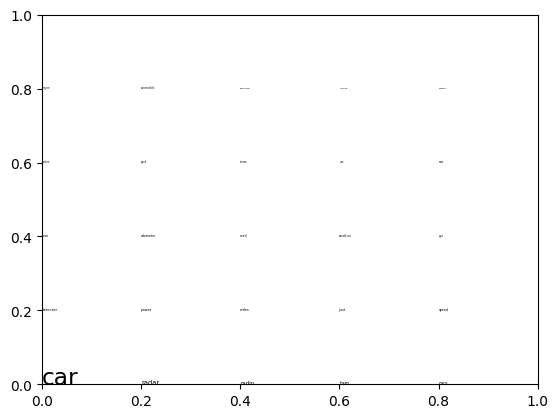

In [53]:
i = 0
for x_coord in np.arange(0, 1, .2):
    for y_coord in np.arange(0, 1, .2):
        word, significance = df_ranked_words.iloc[i].values
        plt.text(y_coord, x_coord, word, fontsize=2*significance)
        i += 1

plt.show()

Our visualization is a mess!  We need to plot our words much more intelligently. This can be done using the external Wordcloud library. The library is able to generate word clouds in a manner that’s visually appealing. Lets import and initialize the library’s `WordCloud` class.

**Listing 15. 52. Initializing the `WordCloud` class

In [54]:
from wordcloud import WordCloud
cloud_generator = WordCloud(random_state=1)

Running `WordCloud()` returns a `cloud_generator` object. We’ll use the object’s `fit_words` method to generate an image. We’ll store that word-cloud image within a `wordcloud_image` variable. However, we won’t plot the image just yet.

**Listing 15. 53. Generating a word-cloud image**

In [55]:
words_to_score = {word: score
                  for word, score in df_ranked_words[:10].values}
wordcloud_image = cloud_generator.fit_words(words_to_score)

Now, we’re ready to visualize `wordcloud_image`. Running `plt.imshow(wordcloud_image)` will display our generated word cloud.

**Listing 15. 54. Plotting an image using `plt.imshow`**

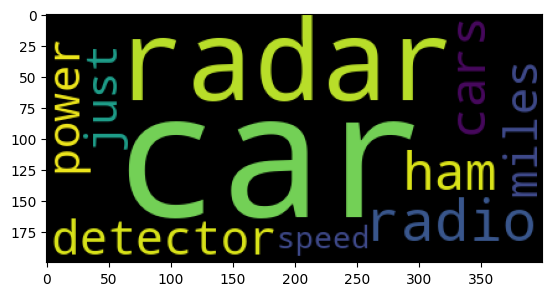

In [56]:
plt.imshow(wordcloud_image)
plt.show()

Our image's dark background makes it hard to read the words. We can change the background from black to white by running `WordCloud(background_color='white')`. Also, the edges of the individual letters are pixelated and blocky. We can smooth all edges in our image plot by passing `interplolation="bilinear"` into `plt.imshow`.

**Listing 15. 55. Improving the word-cloud image quality**

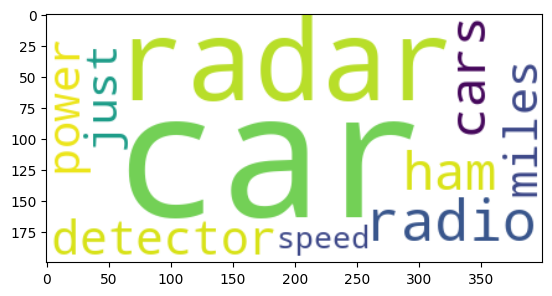

In [57]:
cloud_generator = WordCloud(background_color='white',
                            random_state=1)
wordcloud_image = cloud_generator.fit_words(words_to_score)
plt.imshow(wordcloud_image, interpolation="bilinear")
plt.show()

The top words the car-cluster have been successfully visualized. Now, lets apply word-cloud visualization to some other randomly chosen cluster.

**Listing 15. 56. Plotting a word cloud for a random cluster**

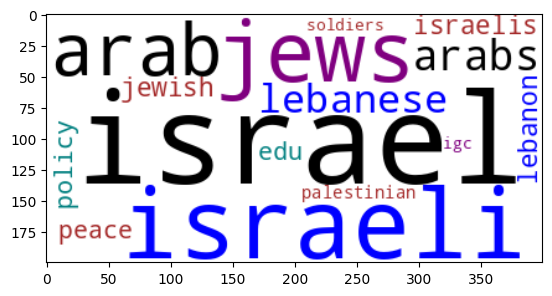

In [58]:
np.random.seed(1)

def cluster_to_image(df_cluster, max_words=15, **kwargs):
    indices = df_cluster.Index.values
    df_ranked_words = rank_words_by_tfidf(indices)[:max_words]
    words_to_score = {word: score
                      for word, score in df_ranked_words[:max_words].values}
    cloud_generator = WordCloud(background_color='white',
                                color_func=_color_func,
                                random_state=1)
    wordcloud_image = cloud_generator.fit_words(words_to_score)
    return wordcloud_image

def _color_func(*args, **kwargs):
    return np.random.choice(['black', 'blue', 'teal', 'purple', 'brown'])

cluster_id = np.random.randint(0, 20)
df_random_cluster = df[df.Cluster == cluster_id]
wordcloud_image = cluster_to_image(df_random_cluster)
plt.imshow(wordcloud_image, interpolation="bilinear")
plt.show()

**WARNING: The contents and the order of the clusters might differ slightly on your local machine. If this occurs, then the randomly chosen cluster will not reflect what is described within these notes.**

Our randomly chosen cluster includes top words  such as _monitor_, _video_, _memory_, _card_, _motherboard_, _bit_, and _ram_. The cluster seems to focus on technology and computer hardware. We can verify by printing the most-common newsgroup category within the cluster.

**Listing 15. 57. Checking the most-common cluster category**

In [59]:
from collections import Counter

def get_top_category(df_cluster):
    categories = [get_post_category(index)
                  for index in df_cluster.Index.values]
    top_category, _ = Counter(categories).most_common()[0]
    return top_category

top_category = get_top_category(df_random_cluster)
print("The posts within the cluster commonly appear in the "
      f"'{top_category}' newsgroup")

The posts within the cluster commonly appear in the 'talk.politics.mideast' newsgroup


W've successfully identified the cluster's topic simply by looking at the word cloud.

So far, we’ve generated two separate word clouds for two distinct clusters. However, our end-goal is to display multiple word clouds simultaneously. We’ll now proceed to visualize all word clouds within a single figure, using a Matplotlib concept called a subplot.


### 15.6.1. Using Subplots to Display Multiple Word Clouds

Matplotlib allows us to include multiple plots within a single figure. Each distinct plot is called a **subplot**. \ We can create a sublot-grid containing `r` rows and `c` columns by running `plt.subplots(r, c)`. Below, we’ll generate 2x2 grid of subplots by running `plt.subplots(2, 2)`.  For every unique subplot positioned at `(r, c`), we’ll plot a quadratic curve in which `y` equals `r * x*x + c * x`.

**Listing 15. 58. Generating 4 subplots using Matplotlib**

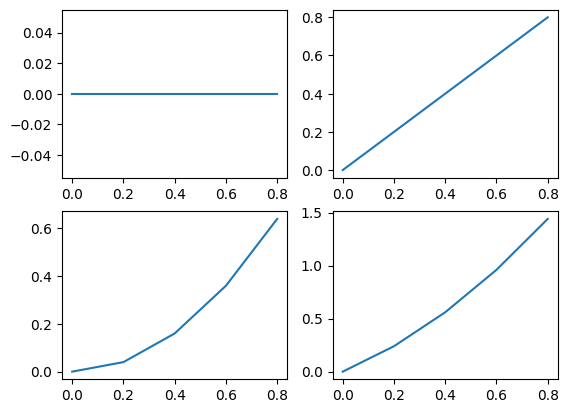

In [60]:
figure, axes = plt.subplots(2, 2)
for r in range(2):
    for c in range(2):
        x = np.arange(0, 1, .2)
        y = r * x * x + c * x
        axes[r][c].plot(x, y)

plt.show()

Four different curves appear within the subplots of our grid. We can replace any of these curves with a word cloud. Lets visualize `wordcloud_image` in the lower-left quadrant of the grid.

**Listing 15. 59. Plotting a word cloud within a subplot**

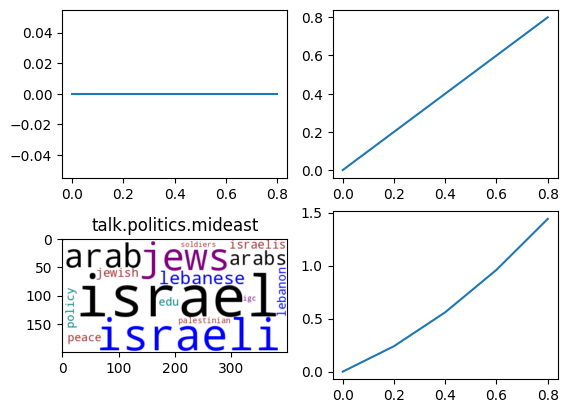

In [61]:
figure, axes = plt.subplots(2, 2)
for r in range(2):
    for c in range(2):
        if (r, c) == (1, 0):
            axes[r][c].set_title(top_category)
            axes[r][c].imshow(wordcloud_image,
                              interpolation="bilinear")
        else:
            x = np.arange(0, 1, .2)
            y = r * x * x + c * x
        axes[r][c].plot(x, y)

plt.show()

Lets generate a figure that’s 10 inches high and 15 inches inches. The large figure will hold 20 subplots, aligned in a 5x4 grid. Each subplot will contain a word cloud corresponding to one of our clusters. Every subplot title will be set to the dominant newsgroup category within a cluster. Also, we’ll include the cluster-index in each title, for later reference. Finally, we’ll remove the axis tick-marks from all plots. The final visualization will give us birds-eye-view of all the dominant word-patterns across all 20 clusters.

**Listing 15. 60. Visualizing all clusters using 20 subplots**

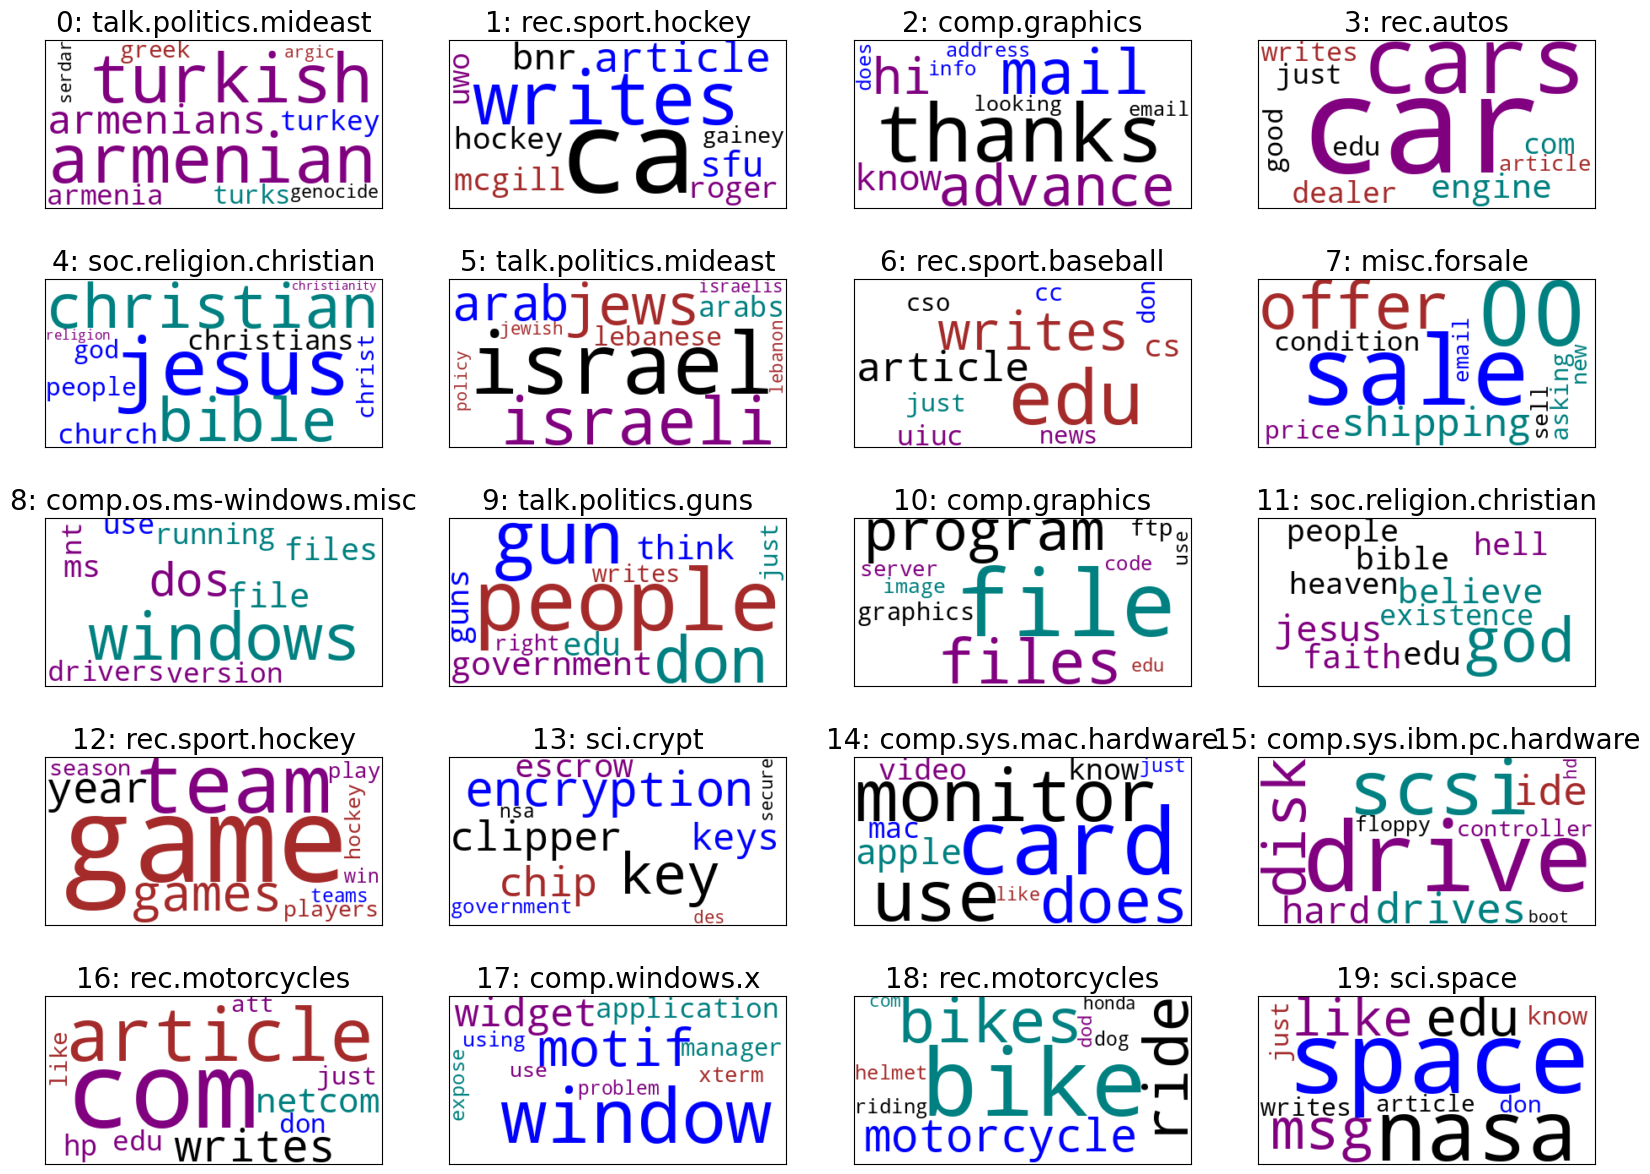

In [62]:
np.random.seed(0)

def get_title(df_cluster):
    top_category = get_top_category(df_cluster)
    cluster_id = df_cluster.Cluster.values[0]
    return f"{cluster_id}: {top_category}"

figure, axes = plt.subplots(5, 4, figsize=(20, 15))
cluster_groups = list(df.groupby('Cluster'))
for r in range(5):
    for c in range(4):
        _, df_cluster = cluster_groups.pop(0)
        wordcloud_image = cluster_to_image(df_cluster, max_words=10)
        ax = axes[r][c]
        ax.imshow(wordcloud_image,
                  interpolation="bilinear")
        ax.set_title(get_title(df_cluster), fontsize=20)
        ax.set_xticks([])
        ax.set_yticks([])

#plt.savefig('../images/fig15-8.png', dpi=600)
plt.show()

We’ve visualized the top words across all 20 clusters. For the most part, the visualized words make sense! Arguably, 75% of the clusters contain top-words corresponding with their dominant category titles.

Of course, there are several issues with our output.For instance, Cluster 7 has a subplot title of `sci.med`, yet is word-cloud is composed of words like _pitt_, _msg_, and _gordon_.  Unfortunately, word-cloud visualization isn’t always perfect. Fortunately, there are steps we can take to salvage indecipherable word-clouds. For instance, we could disregard the top x words within the cluster, and visualize the cloud using the next top-raking words. Below, we will remove the top 10 words from Cluster 7.

**Listing 15. 61. Recomputing a word cloud after filtering**

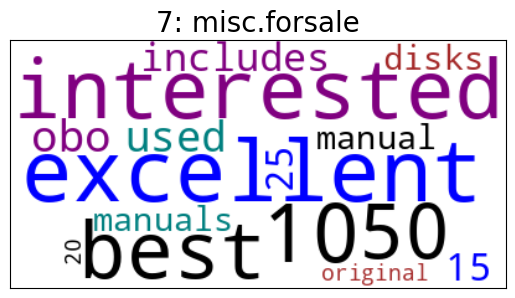

In [63]:
np.random.seed(3)
df_cluster= df[df.Cluster == 7]
df_ranked_words = rank_words_by_tfidf(df_cluster.Index.values)

words_to_score = {word: score
                  for word, score in df_ranked_words[10:25].values}
cloud_generator = WordCloud(background_color='white',
                            color_func=_color_func,
                            random_state=1)
wordcloud_image = cloud_generator.fit_words(words_to_score)
plt.imshow(wordcloud_image, interpolation="bilinear")
plt.title(get_title(df_cluster), fontsize=20)
plt.xticks([])
plt.yticks([])
plt.show()